# Basic feature interrelation analysis using the 'fip3' library

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

from fip import profiles

In [2]:
DATASET_NAME = 'ChEMBL28'
FEATURES_NAME = 'ECFP1-like substructures'
COOCCURRENCE_MX_LINK = '../../scratch/data/chembl_28/ec_fragments_r1_coomx.csv'
COOCCURRENCE_MX_VECTOR_COUNT = 2066376
MINIMAL_COOCCURRENCE_CUTOFF = 10

## Loading interrelation profiles
From interrelation files already preprocessed by scripts in fip3/scripts

In [3]:
p = profiles.CooccurrenceProfile.from_dataframe(
    pd.read_csv(COOCCURRENCE_MX_LINK), min_cutoff_value=MINIMAL_COOCCURRENCE_CUTOFF)
p

In [4]:
p.df

value
feature1 feature2            
C=O      C=O          1424230
         Cc(c)c        624876
         c-n(c)n        37580
         c=O           120205
         cC            273990
...                       ...
c=C(N)O  ccn               11
C=NN     C=c               11
C=c      CNN               11
c-c(n)s  nc(-n)[nH]        10
CCI      NS(=O)(=O)O       13

[112129 rows x 1 columns]

## General characterization of co-occurrence profile

In [5]:
print(f"There are {len(p.distinct_features())} distinct {FEATURES_NAME} within {DATASET_NAME}.")

There are 1640 distinct ECFP1-like substructures within ChEMBL28.


In [6]:
self_relations_values = p.select_self_relations()['value']
self_relations_values

feature1    feature2  
C=O         C=O           1424230
Cc(c)c      Cc(c)c         717878
c-n(c)n     c-n(c)n         55340
c=O         c=O            222434
cC          cC             408262
                           ...   
cC[Te]      cC[Te]             10
BO[Si]      BO[Si]             22
NC(=O)[S-]  NC(=O)[S-]         15
[N+][N-]S   [N+][N-]S          20
BC(c)=C     BC(c)=C            14
Name: value, Length: 1640, dtype: int64

[Text(0.5, 1.0, 'Stand-alone ECFP1-like substructures occurrence in ChEMBL28'),
 Text(0.5, 0, 'Stand-alone occurrence count within ChEMBL28'),
 Text(0, 0.5, 'ECFP1-like substructures')]

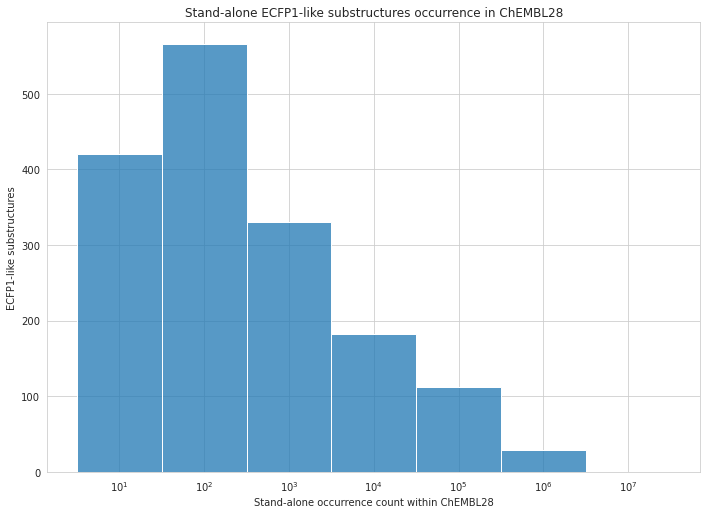

In [7]:
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(self_relations_values, log_scale=True, discrete=True)
ax.set(title=f"Stand-alone {FEATURES_NAME} occurrence in {DATASET_NAME}",
        xlabel=f"Stand-alone occurrence count within {DATASET_NAME}", ylabel=f"{FEATURES_NAME}")

In [8]:
cooccurrence_values = p.select_raw_interrelations()['value']
cooccurrence_values

feature1  feature2   
C=O       Cc(c)c         624876
          c-n(c)n         37580
          c=O            120205
          cC             273990
          cC(c)=O         30748
                          ...  
c=C(N)O   ccn                11
C=NN      C=c                11
C=c       CNN                11
c-c(n)s   nc(-n)[nH]         10
CCI       NS(=O)(=O)O        13
Name: value, Length: 110489, dtype: int64

In [9]:
print(f"There is in total {self_relations_values.sum()} feature stand-alone occurrences and \
{cooccurrence_values.sum()} feature co-occurrences for {FEATURES_NAME} within {DATASET_NAME}")

There is in total 33715089 feature stand-alone occurrences and 279126440 feature co-occurrences for ECFP1-like substructures within ChEMBL28


[Text(0.5, 1.0, 'Co-occurrence counts of ECFP1-like substructures in ChEMBL28'),
 Text(0.5, 0, 'Co-occurrence counts within ChEMBL28'),
 Text(0, 0.5, 'ECFP1-like substructures co-occurrences')]

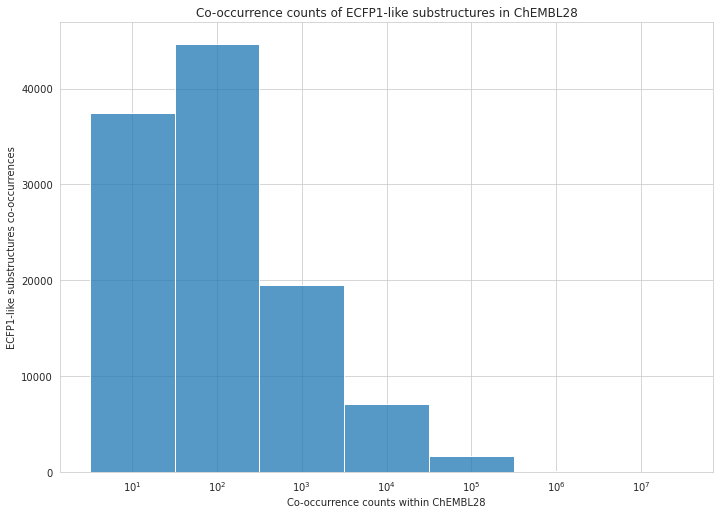

In [10]:
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(cooccurrence_values, log_scale=True, discrete=True)
ax.set(title=f"Co-occurrence counts of {FEATURES_NAME} in {DATASET_NAME}",
        xlabel=f"Co-occurrence counts within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} co-occurrences")

In [11]:
print(f"The maximum theoretical number of different feature interrelations of the observed {FEATURES_NAME} \
within {DATASET_NAME} would be {int(p.num_max_interrelations())}, whereas the number of actual observed \
interrelations is only {p.num_raw_interrelations()}. Therefore, the interrelation matrix population ratio is \
approx. {p.num_raw_interrelations() / p.num_max_interrelations():.4f}.")

The maximum theoretical number of different feature interrelations of the observed ECFP1-like substructures within ChEMBL28 would be 1343980, whereas the number of actual observed interrelations is only 110489. Therefore, the interrelation matrix population ratio is approx. 0.0822.


In [12]:
print(f"The mean co-occurrence value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

The mean co-occurrence value for ECFP1-like substructures within ChEMBL28 is 2526.28, with the standard deviation of 19737.91. The mean stand-alone value is 20557.98, with the standard deviation of 104840.67.


## General characterization of pointwise mutual information profile

In [13]:
p = profiles.CooccurrenceProbabilityProfile.from_cooccurrence_profile(
    p, vector_count=COOCCURRENCE_MX_VECTOR_COUNT)
p

In [14]:
p.select_self_relations()['value']

feature1    feature2  
C=O         C=O           0.689240
Cc(c)c      Cc(c)c        0.347409
c-n(c)n     c-n(c)n       0.026781
c=O         c=O           0.107644
cC          cC            0.197574
                            ...   
cC[Te]      cC[Te]        0.000005
BO[Si]      BO[Si]        0.000011
NC(=O)[S-]  NC(=O)[S-]    0.000007
[N+][N-]S   [N+][N-]S     0.000010
BC(c)=C     BC(c)=C       0.000007
Name: value, Length: 1640, dtype: float64

In [15]:
p.select_self_relations()['value'].min()

4.83939031425065e-06

In [16]:
p.select_raw_interrelations()['value'].min()

4.83939031425065e-06

In [17]:
p = profiles.PointwiseMutualInformationProfile.from_cooccurrence_probability_profile(p)

p

In [18]:
p.df

value
feature1 feature2             
C=O      C=O          0.000000
         Cc(c)c       0.336752
         c-n(c)n     -0.021437
         c=O         -0.350960
         cC          -0.038451
...                        ...
c=C(N)O  ccn          1.220514
C=NN     C=c          4.198753
C=c      CNN          4.381283
c-c(n)s  nc(-n)[nH]  -0.033334
CCI      NS(=O)(=O)O  3.943011

[112129 rows x 1 columns]

In [19]:
pmi_values = p.select_raw_interrelations()['value']
pmi_values

feature1  feature2   
C=O       Cc(c)c         0.336752
          c-n(c)n       -0.021437
          c=O           -0.350960
          cC            -0.038451
          cC(c)=O        0.536921
                           ...   
c=C(N)O   ccn            1.220514
C=NN      C=c            4.198753
C=c       CNN            4.381283
c-c(n)s   nc(-n)[nH]    -0.033334
CCI       NS(=O)(=O)O    3.943011
Name: value, Length: 110489, dtype: float64

[Text(0.5, 1.0, 'PMI value distribution for ECFP1-like substructures in ChEMBL28'),
 Text(0.5, 0, 'PMI value bins within ChEMBL28'),
 Text(0, 0.5, 'ECFP1-like substructures counts')]

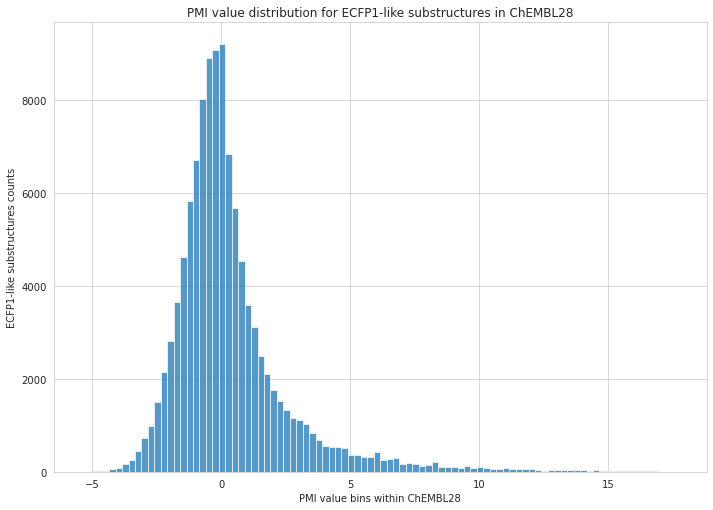

In [20]:
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(pmi_values, binwidth=0.25)
ax.set(title=f"PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}",
        xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")

In [21]:
print(f"The mean PMI value for {FEATURES_NAME} within {DATASET_NAME} \
is {p.mean_raw_interrelation_value():.2f}, \
with the standard deviation of {p.standard_raw_interrelation_deviation():.2f}. \
The mean stand-alone value is {p.mean_self_relation_value():.2f}, \
with the standard deviation of {p.standard_self_relation_deviation():.2f}.")

The mean PMI value for ECFP1-like substructures within ChEMBL28 is 0.36, with the standard deviation of 2.32. The mean stand-alone value is 0.00, with the standard deviation of 0.00.


[Text(0.5, 1.0, 'Full PMI value distribution for ECFP1-like substructures in ChEMBL28, with imputation.'),
 Text(0.5, 0, 'PMI value bins within ChEMBL28'),
 Text(0, 0.5, 'ECFP1-like substructures counts')]

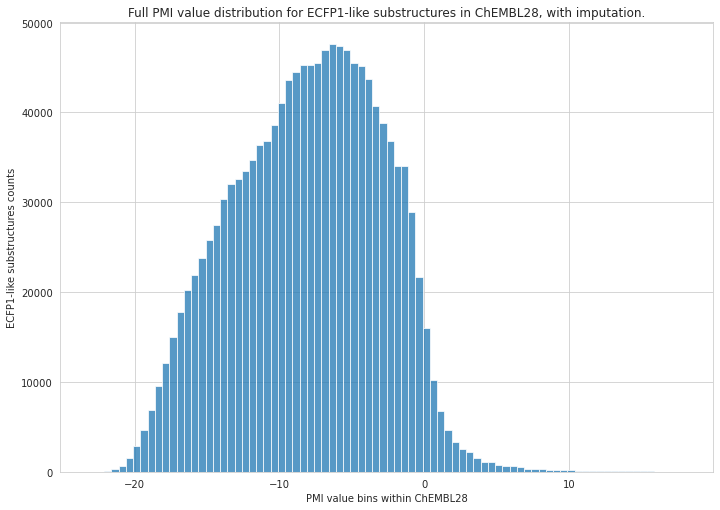

In [22]:
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot([value for f1, f2, value in p.iterate_feature_interrelations()], binwidth=0.5)
ax.set(title=f"Full PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}, with imputation.",
        xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")

In [23]:
major_pmi_values = p.select_major_interrelations(2)['value']
major_pmi_values

feature1       feature2  
cc([nH])=O     nc([nH])=O     5.251617
cC[n+]         c[n+](c)C      6.626132
               cc(c)[n+]      5.581563
               cc[n+]         6.497581
c[n+](c)C      cc(c)[n+]      6.061171
                               ...    
CC(=N)O        NBr            9.758454
CC(C)(C)Br     NBr           11.867710
NBr            cC(c)C         5.882763
[nH]c([nH])=O  cn(c)[nH]      5.869877
C=c            c=C(N)O       16.323320
Name: value, Length: 5178, dtype: float64

[Text(0.5, 1.0, 'Major PMI value distribution for ECFP1-like substructures in ChEMBL28'),
 Text(0.5, 0, 'PMI value bins within ChEMBL28'),
 Text(0, 0.5, 'ECFP1-like substructures counts')]

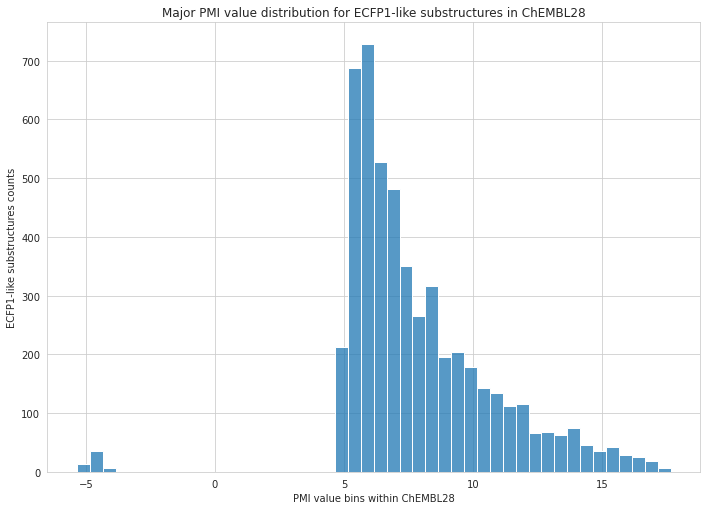

In [24]:
a4_dims = (11.7, 8.27)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(major_pmi_values, binwidth=0.5)
ax.set(title=f"Major PMI value distribution for {FEATURES_NAME} in {DATASET_NAME}",
        xlabel=f"PMI value bins within {DATASET_NAME}", ylabel=f"{FEATURES_NAME} counts")

In [25]:
p.mean_raw_interrelation_value()

0.3625016352839537

In [26]:
p.mean_interrelation_value()

-8.028187184379897

## Graph visualization of PMI profile

In [55]:
graph = nx.Graph()
major_pmi_values = p.select_major_interrelations(2)

for feature_pair, value in major_pmi_values[major_pmi_values['value'] > 0].iterrows():
    graph.add_edge(feature_pair[0], feature_pair[1], weight=float(value))
graph

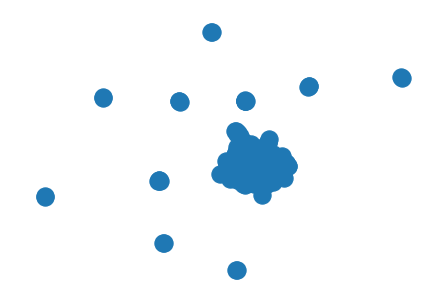

In [56]:
nx.draw_kamada_kawai(graph)